<a href="https://colab.research.google.com/github/Manimaran-M3/SENTIMENTAL-ANALYSIS/blob/main/SENTIMENTAL_ANALYSIS_COMPLAINT_TICKETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn transformers torch nltk spacy openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import pipeline


IMPORTING THE DATASET

In [ ]:
import pandas as pd
df = pd.read_excel("/content/Consolidated Tracker (1).xlsx",skiprows=4)
df.head()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,Customer Responded Time,Resolution,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days
0,234003,UBA,UBA Bank - Vision EOM July-2024,01 Aug 2024 07:02 AM,P2,Closed,Process,11mos 3w,4d 1h,-,05 Aug 2024 08:33 AM,-,Dinesh Ramu,-,-,Priority 2,Resolution Violation,0.0
1,234005,UBA,Re: July 2024 EOM STATUS REPORT,01 Aug 2024 08:53 AM,P3,Closed,Process,11mos 3w,1w 0d,-,01 Aug 2024 08:53 AM,-,Sai vikash,-,-,Priority 3,Not Violated,0.0
2,234006,UMB,Unable to connect VPN-UMB,01 Aug 2024 10:36 AM,P1,Closed,Communication,11mos 3w,04:11:00,-,01 Aug 2024 02:45 PM,-,-,-,-,Priority 1,Not Violated,0.0
3,234008,CalBank,EOD RESTORE DELAY,01 Aug 2024 11:14 AM,P1,Closed,Communication,11mos 3w,23:16:00,-,02 Aug 2024 10:29 AM,-,-,-,-,Priority 1,Resolution Violation,0.0
4,234009,IM-RW,I&M RW EOD Update 31-Jul-2024,01 Aug 2024 11:17 AM,P3,Closed,Process,11mos 3w,04:15:00,-,01 Aug 2024 03:07 PM,-,-,-,-,Priority 3,Not Violated,0.0


In [ ]:
df1 = pd.read_excel("/content/email_subjects_with_sentiment.xlsx", sheet_name=1)
df1.head()

,Subject,Sentiment
0,UBA Bank - Vision EOM July-2024,Positive
1,Re: July 2024 EOM STATUS REPORT,Positive
2,Unable to connect VPN-UMB,Negative
3,EOD RESTORE DELAY,Negative
4,I&M RW EOD Update 31-Jul-2024,Positive


In [ ]:
df['true_sentiment'] = df1["Sentiment"]
df.head()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,Customer Responded Time,Resolution,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days,true_sentiment
0,234003,UBA,UBA Bank - Vision EOM July-2024,01 Aug 2024 07:02 AM,P2,Closed,Process,11mos 3w,4d 1h,-,05 Aug 2024 08:33 AM,-,Dinesh Ramu,-,-,Priority 2,Resolution Violation,0.0,Positive
1,234005,UBA,Re: July 2024 EOM STATUS REPORT,01 Aug 2024 08:53 AM,P3,Closed,Process,11mos 3w,1w 0d,-,01 Aug 2024 08:53 AM,-,Sai vikash,-,-,Priority 3,Not Violated,0.0,Positive
2,234006,UMB,Unable to connect VPN-UMB,01 Aug 2024 10:36 AM,P1,Closed,Communication,11mos 3w,04:11:00,-,01 Aug 2024 02:45 PM,-,-,-,-,Priority 1,Not Violated,0.0,Negative
3,234008,CalBank,EOD RESTORE DELAY,01 Aug 2024 11:14 AM,P1,Closed,Communication,11mos 3w,23:16:00,-,02 Aug 2024 10:29 AM,-,-,-,-,Priority 1,Resolution Violation,0.0,Negative
4,234009,IM-RW,I&M RW EOD Update 31-Jul-2024,01 Aug 2024 11:17 AM,P3,Closed,Process,11mos 3w,04:15:00,-,01 Aug 2024 03:07 PM,-,-,-,-,Priority 3,Not Violated,0.0,Positive


DATA FORMETING(DATA CLEANING)

In [ ]:
df = df.dropna(subset=['Subject'])
df.head()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,Customer Responded Time,Resolution,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days,true_sentiment
0,234003,UBA,UBA Bank - Vision EOM July-2024,01 Aug 2024 07:02 AM,P2,Closed,Process,11mos 3w,4d 1h,-,05 Aug 2024 08:33 AM,-,Dinesh Ramu,-,-,Priority 2,Resolution Violation,0.0,Positive
1,234005,UBA,Re: July 2024 EOM STATUS REPORT,01 Aug 2024 08:53 AM,P3,Closed,Process,11mos 3w,1w 0d,-,01 Aug 2024 08:53 AM,-,Sai vikash,-,-,Priority 3,Not Violated,0.0,Positive
2,234006,UMB,Unable to connect VPN-UMB,01 Aug 2024 10:36 AM,P1,Closed,Communication,11mos 3w,04:11:00,-,01 Aug 2024 02:45 PM,-,-,-,-,Priority 1,Not Violated,0.0,Negative
3,234008,CalBank,EOD RESTORE DELAY,01 Aug 2024 11:14 AM,P1,Closed,Communication,11mos 3w,23:16:00,-,02 Aug 2024 10:29 AM,-,-,-,-,Priority 1,Resolution Violation,0.0,Negative
4,234009,IM-RW,I&M RW EOD Update 31-Jul-2024,01 Aug 2024 11:17 AM,P3,Closed,Process,11mos 3w,04:15:00,-,01 Aug 2024 03:07 PM,-,-,-,-,Priority 3,Not Violated,0.0,Positive


In [ ]:
import re

# npl = spacy.load("en_core_web_sm")

def clean_text(text):
    if pd.isnull(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove common prefixes like "Re:" or "FW:"
    text = re.sub(r"^(re|fw):\s*", "", text, flags=re.IGNORECASE)

    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)

    text = re.sub(r"\b(eom|eod|etc|db|vpn|etl|sql)\b", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

df['clean_subject'] = df['Subject'].astype(str).apply(clean_text)

In [ ]:
df.head()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,Customer Responded Time,Resolution,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days,true_sentiment,clean_subject
0,234003,UBA,UBA Bank - Vision EOM July-2024,01 Aug 2024 07:02 AM,P2,Closed,Process,11mos 3w,4d 1h,-,05 Aug 2024 08:33 AM,-,Dinesh Ramu,-,-,Priority 2,Resolution Violation,0.0,Positive,uba bank vision july
1,234005,UBA,Re: July 2024 EOM STATUS REPORT,01 Aug 2024 08:53 AM,P3,Closed,Process,11mos 3w,1w 0d,-,01 Aug 2024 08:53 AM,-,Sai vikash,-,-,Priority 3,Not Violated,0.0,Positive,july status report
2,234006,UMB,Unable to connect VPN-UMB,01 Aug 2024 10:36 AM,P1,Closed,Communication,11mos 3w,04:11:00,-,01 Aug 2024 02:45 PM,-,-,-,-,Priority 1,Not Violated,0.0,Negative,unable to connect vpnumb
3,234008,CalBank,EOD RESTORE DELAY,01 Aug 2024 11:14 AM,P1,Closed,Communication,11mos 3w,23:16:00,-,02 Aug 2024 10:29 AM,-,-,-,-,Priority 1,Resolution Violation,0.0,Negative,restore delay
4,234009,IM-RW,I&M RW EOD Update 31-Jul-2024,01 Aug 2024 11:17 AM,P3,Closed,Process,11mos 3w,04:15:00,-,01 Aug 2024 03:07 PM,-,-,-,-,Priority 3,Not Violated,0.0,Positive,im rw update jul


SENTIMENT ANALYSIS

In [ ]:
from transformers import pipeline

In [ ]:

sentiment_analyser = pipeline("sentiment-analysis")
df['sentiment'] = df['clean_subject'].apply(lambda x: sentiment_analyser(x)[0]['label'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
df.tail()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,...,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days,true_sentiment,clean_subject,sentiment,emotion
1995,236717,Stanbic Bank KE,Unable to connect VPN- Stanbic,03 Feb 2025 09:52 AM,P3,Closed,Process,5mos 2w,1d 4h,-,...,Raja Vignesh,-,-,Priority 3,Response Violation,0.0,Negative,unable to connect stanbic,NEGATIVE,fear
1996,236719,Family Bank,Family Bank - VPN Extension for Feb 2025,03 Feb 2025 11:09 AM,P2,Closed,Process,5mos 2w,5d 22h,-,...,Dinesh Ramu,-,-,Priority 2,Response and Resolution Violation,0.0,Negative,family bank extension for feb,POSITIVE,joy
1997,236721,NCBA Bank,TZ-UG OCT 2024 DATA,03 Feb 2025 11:27 AM,P3,Closed,New Request,5mos 2w,00:27:00,-,...,Gokul;GunaPriya,-,-,Priority 3,Not Violated,0.0,Negative,tzug oct data,NEGATIVE,fear
1998,236725,DTB,FW: NEW BUSINESS REPORT,03 Feb 2025 12:27 PM,P3,Closed,Reports,5mos 2w,4d 10h,-,...,Srisudharshanan,-,-,Priority 3,Response Violation,0.0,Positive,new business report,POSITIVE,joy
1999,236723,NCBA Bank,NCSLBRN190 - Fund Transfer (External) - Pesalink,03 Feb 2025 12:13 PM,P3,Closed,Process,5mos 2w,1d 11h,-,...,GunaPriya,-,-,Priority 3,Response Violation,0.0,Negative,ncslbrn fund transfer external pesalink,NEGATIVE,joy


In [ ]:
emotional_analyser = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")
df['emotion'] = df['clean_subject'].astype(str).apply(lambda x : emotional_analyser(x)[0]['label'])

Device set to use cpu


In [ ]:
df.head()

,Ticket Id,Team,Subject,Created Time (Ticket),Priority (Ticket),Status (Ticket),Classifications,Ticket Age,Resolution Time in Business Hours,Ticket On Hold Time,...,Team Member,Total Response Time in Business Hours,Total Time Spent,SLA Name (Ticket),SLA Violation Type,Ticket Age - Days,true_sentiment,clean_subject,sentiment,emotion
0,234003,UBA,UBA Bank - Vision EOM July-2024,01 Aug 2024 07:02 AM,P2,Closed,Process,11mos 3w,4d 1h,-,...,Dinesh Ramu,-,-,Priority 2,Resolution Violation,0.0,Positive,uba bank vision july,POSITIVE,joy
1,234005,UBA,Re: July 2024 EOM STATUS REPORT,01 Aug 2024 08:53 AM,P3,Closed,Process,11mos 3w,1w 0d,-,...,Sai vikash,-,-,Priority 3,Not Violated,0.0,Positive,july status report,POSITIVE,fear
2,234006,UMB,Unable to connect VPN-UMB,01 Aug 2024 10:36 AM,P1,Closed,Communication,11mos 3w,04:11:00,-,...,-,-,-,Priority 1,Not Violated,0.0,Negative,unable to connect vpnumb,NEGATIVE,fear
3,234008,CalBank,EOD RESTORE DELAY,01 Aug 2024 11:14 AM,P1,Closed,Communication,11mos 3w,23:16:00,-,...,-,-,-,Priority 1,Resolution Violation,0.0,Negative,restore delay,NEGATIVE,joy
4,234009,IM-RW,I&M RW EOD Update 31-Jul-2024,01 Aug 2024 11:17 AM,P3,Closed,Process,11mos 3w,04:15:00,-,...,-,-,-,Priority 3,Not Violated,0.0,Positive,im rw update jul,NEGATIVE,joy


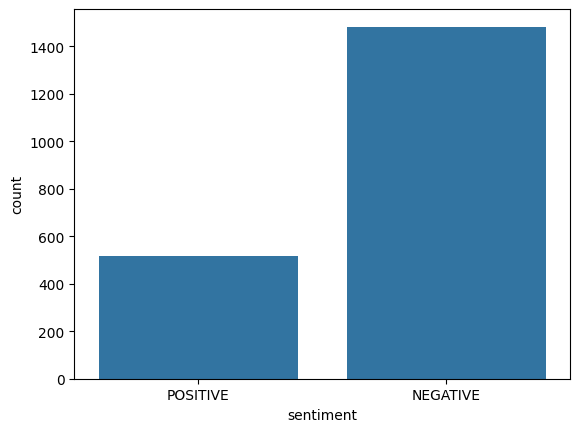

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment', data=df)
plt.show()

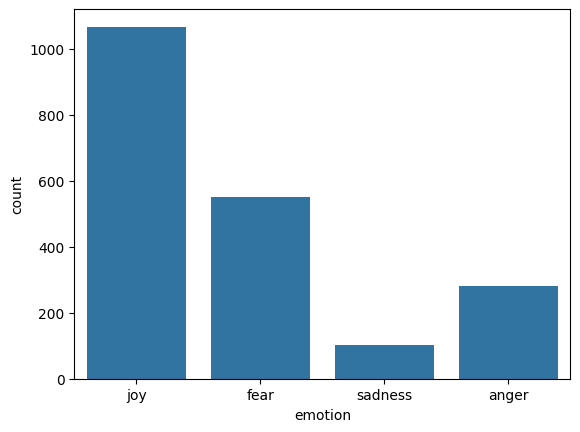

In [ ]:
sns.countplot(x='emotion' , data=df)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
y_true = df['true_sentiment'].str.lower()
y_pred = df['sentiment'].str.lower()
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

In [ ]:
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Accuracy:  0.67
Precision: 0.57
Recall:    0.57
F1 Score:  0.57


In [ ]:
print(classification_report(y_true, y_pred, digits=2))


              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      1471
    positive       0.37      0.36      0.36       529

    accuracy                           0.67      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.66      0.67      0.67      2000



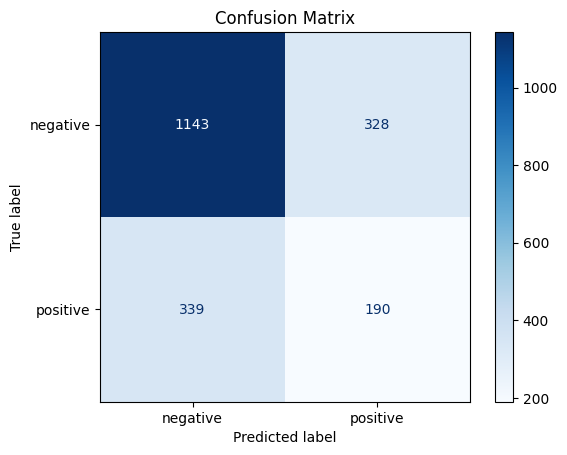

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['negative',  'positive']
cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()